<a href="https://colab.research.google.com/github/mornville/RNNs/blob/master/SimpleRNN_Sine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import LSTM, SimpleRNN, Input, Dense


In [0]:
data = pd.read_csv('sample_data/GOOG.csv')

In [22]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [0]:
#dummy data
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*.1

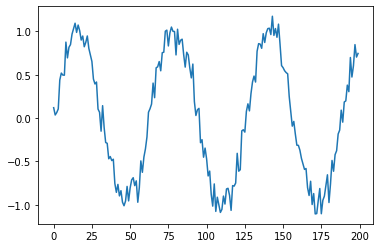

In [35]:
plot.plot(series)
plot.show()

In [52]:
T = 10
X = []
Y = []
D = 1
for t in range(len(series)-T):
  x = series[t:t+T] #for prediction train values
  X.append(x)
  print('pass - ', t)
  # print(x)
  y = series[t+T] #prediction
  # print(y)
  Y.append(y)

pass -  0
pass -  1
pass -  2
pass -  3
pass -  4
pass -  5
pass -  6
pass -  7
pass -  8
pass -  9
pass -  10
pass -  11
pass -  12
pass -  13
pass -  14
pass -  15
pass -  16
pass -  17
pass -  18
pass -  19
pass -  20
pass -  21
pass -  22
pass -  23
pass -  24
pass -  25
pass -  26
pass -  27
pass -  28
pass -  29
pass -  30
pass -  31
pass -  32
pass -  33
pass -  34
pass -  35
pass -  36
pass -  37
pass -  38
pass -  39
pass -  40
pass -  41
pass -  42
pass -  43
pass -  44
pass -  45
pass -  46
pass -  47
pass -  48
pass -  49
pass -  50
pass -  51
pass -  52
pass -  53
pass -  54
pass -  55
pass -  56
pass -  57
pass -  58
pass -  59
pass -  60
pass -  61
pass -  62
pass -  63
pass -  64
pass -  65
pass -  66
pass -  67
pass -  68
pass -  69
pass -  70
pass -  71
pass -  72
pass -  73
pass -  74
pass -  75
pass -  76
pass -  77
pass -  78
pass -  79
pass -  80
pass -  81
pass -  82
pass -  83
pass -  84
pass -  85
pass -  86
pass -  87
pass -  88
pass -  89
pass -  90
pass -  9

In [64]:
X, Y = np.array(X).reshape(-1,T,1), np.array(Y)
N = len(X)
# print(Y)
X.shape, Y.shape


((190, 10, 1), (190,))

In [81]:
## RNN model
i = Input(shape = (T, 1))
x = SimpleRNN(5, activation=None)(i)
x = Dense(1)(x)
model = Model(i,x)
model.compile(loss='mse', optimizer = Adam(lr=0.1))

##train
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
3/3 [==============================] - 0s 49ms/step - loss: 3.2600 - val_loss: 0.3042
Epoch 2/80
3/3 [==============================] - 0s 13ms/step - loss: 0.2181 - val_loss: 0.1843
Epoch 3/80
3/3 [==============================] - 0s 12ms/step - loss: 0.2028 - val_loss: 0.2070
Epoch 4/80
3/3 [==============================] - 0s 12ms/step - loss: 0.1382 - val_loss: 0.1222
Epoch 5/80
3/3 [==============================] - 0s 12ms/step - loss: 0.1127 - val_loss: 0.1371
Epoch 6/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0968 - val_loss: 0.0588
Epoch 7/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0459 - val_loss: 0.0378
Epoch 8/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0349 - val_loss: 0.0484
Epoch 9/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0374 - val_loss: 0.0378
Epoch 10/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0405 - val_loss: 0.0437
Epoch 11/80
3/3 [============

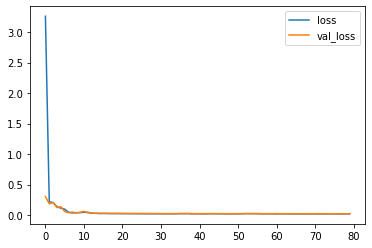

In [82]:
plot.plot(r.history['loss'], label='loss')
plot.plot(r.history['val_loss'], label = 'val_loss')
plot.legend()

In [0]:
validation_target = Y[-N//2:]
validation_predictions = []

#last train input
last_x = X[-N//2]

while len(validation_predictions)<len(validation_target):
  p = model.predict(last_x.reshape(1,-1,1))[0,0] #1x1Array
  #update prediction
  validation_predictions.append(p)
  #making new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

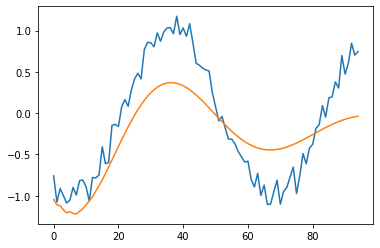

In [84]:
plot.plot(validation_target, label='val_real forcasts')
plot.plot(validation_predictions, label='val_pred')